In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.datasets import fetch_california_housing


In [ ]:
# Load the California housing dataset
print("Loading dataset...")
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display dataset information
print("Dataset loaded successfully!")
print(df.head())
print(df.info())

Loading dataset...
Dataset loaded successfully!
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveB

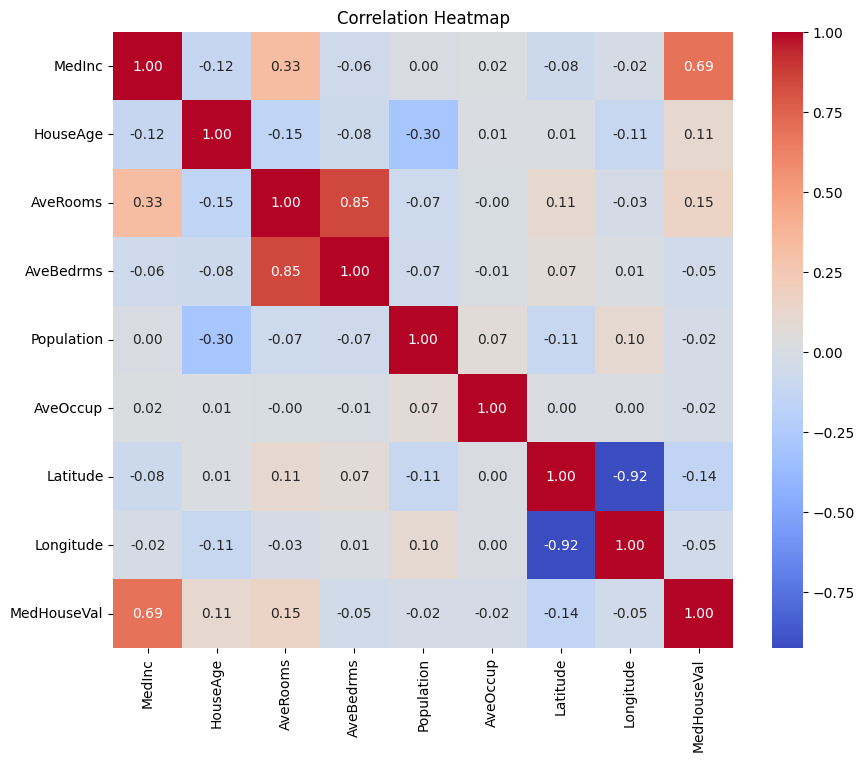

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Step 4: Define Features and Target
X = df.drop(columns=["MedHouseVal"])  # Features
y = df["MedHouseVal"]  # Target variable (Median House Value)

In [ ]:
# Step 5: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")


Training Set Shape: (16512, 8)
Test Set Shape: (4128, 8)


In [ ]:
# Step 6: Train Regression Model
# Choose a model (Linear Regression or Random Forest Regressor)
print("Training model...")
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Use LinearRegression() for a simpler model
model.fit(X_train, y_train)
print("Model training completed!")

Training model...
Model training completed!


In [ ]:
# Step 7: Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 0.2553684927247781
R² Score: 0.8051230593157366


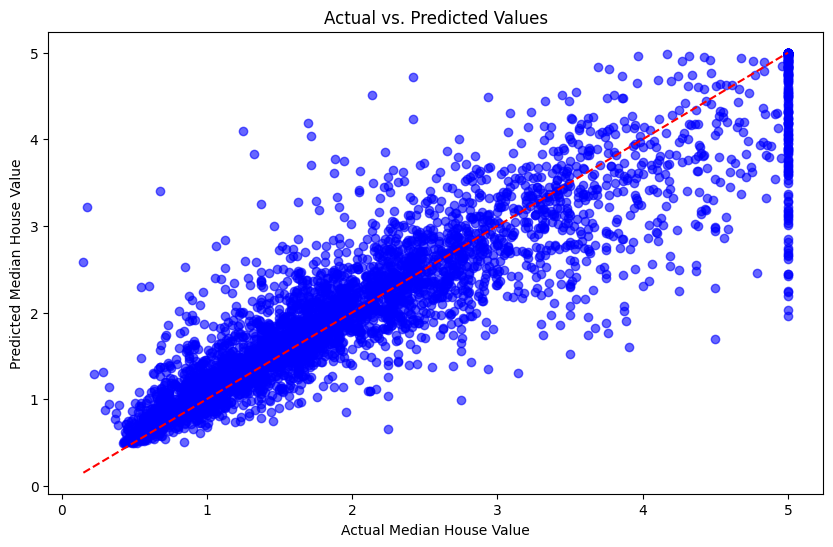

In [ ]:

# Step 9: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--", color="red")
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.show()

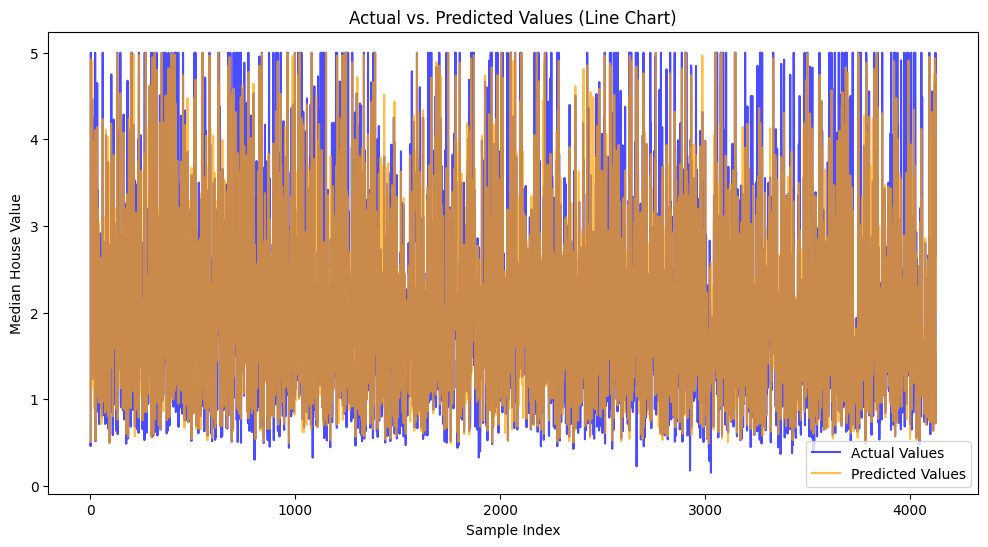

In [ ]:
# Step 10: Visualization (Line Chart: Predicted vs. Actual Values)
# Sort by index to align actual and predicted values
y_test_sorted = y_test.reset_index(drop=True).sort_index()
y_pred_sorted = pd.Series(y_pred).sort_index()

plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Values", color="blue", alpha=0.7)
plt.plot(y_pred_sorted, label="Predicted Values", color="orange", alpha=0.7)
plt.title("Actual vs. Predicted Values (Line Chart)")
plt.xlabel("Sample Index")
plt.ylabel("Median House Value")
plt.legend()
plt.show()